In [2]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set a consistent visual style for plots
sns.set_theme(style="whitegrid")

# URL for the dataset
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz"

# Load the dataset
try:
    df = pd.read_csv(data_url, compression='gzip')
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")

# --- Initial Inspection ---

# 1. Convert 'date_time' column
df['date_time'] = pd.to_datetime(df['date_time'])

# 2. Display the first 5 rows
print("\n--- df.head() ---")
print(df.head())

# 3. Display DataFrame info
print("\n--- df.info() ---")
df.info()

# 4. Display descriptive statistics (Corrected line)
print("\n--- df.describe(include='all') ---")
print(df.describe(include='all'))

Dataset loaded successfully.

--- df.head() ---
  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description           date_time  traffic_volume  
0    scattered clouds 2012-10-02 09:00:00            5545  
1       broken clouds 2012-10-02 10:00:00            4516  
2     overcast clouds 2012-10-02 11:00:00            4767  
3     overcast clouds 2012-10-02 12:00:00            5026  
4       broken clouds 2012-10-02 13:00:00            4918  

--- df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------            

In [3]:
# Cell 2 (NEW): Data Cleaning for 'holiday' column
# From df.info(), we know 'holiday' has only 61 non-null values.
# We will fill the 48,143 missing (NaN) values with the string 'None'.
df['holiday'] = df['holiday'].fillna('None')

# Verify the change
print("--- Holiday column after cleaning: ---")
print(df['holiday'].value_counts())

--- Holiday column after cleaning: ---
holiday
None                         48143
Labor Day                        7
Christmas Day                    6
Thanksgiving Day                 6
Martin Luther King Jr Day        6
New Years Day                    6
Veterans Day                     5
Columbus Day                     5
Memorial Day                     5
Washingtons Birthday             5
State Fair                       5
Independence Day                 5
Name: count, dtype: int64


In [4]:
# Cell 3: Task 2.1.A - Central Tendency and Dispersion
print("--- Task 2.1.A: Central Tendency & Dispersion ---")

traffic_stats = df['traffic_volume'].describe()
print(traffic_stats)

# Extract specific values
mean_volume = traffic_stats['mean']
median_volume = traffic_stats['50%']
mode_volume = df['traffic_volume'].mode()[0]
std_dev = traffic_stats['std']
range_volume = traffic_stats['max'] - traffic_stats['min']

print(f"\nMean (المتوسط): {mean_volume:.2f}")
print(f"Median (الوسيط): {median_volume:.2f}")
print(f"Mode (المنوال): {mode_volume:.2f}")
print(f"Standard Deviation (الانحراف المعياري): {std_dev:.2f}")
print(f"Range (المدى): {range_volume:.2f}")

# Analysis for Question 2
if mean_volume > median_volume:
    print("\nAnticipation: Mean > Median suggests a potential positive (right) skew.")
elif mean_volume < median_volume:
    print("\nAnticipation: Mean < Median suggests a potential negative (left) skew.")
else:
    print("\nAnticipation: Mean ≈ Median suggests a symmetrical distribution.")

--- Task 2.1.A: Central Tendency & Dispersion ---
count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Mean (المتوسط): 3259.82
Median (الوسيط): 3380.00
Mode (المنوال): 353.00
Standard Deviation (الانحراف المعياري): 1986.86
Range (المدى): 7280.00

Anticipation: Mean < Median suggests a potential negative (left) skew.


In [5]:
# Cell 4: Task 2.1.B - Skewness and Kurtosis
print("\n--- Task 2.1.B: Skewness and Kurtosis ---")

skewness = df['traffic_volume'].skew()
print(f"Skewness (الالتواء): {skewness:.4f}")

kurtosis = df['traffic_volume'].kurt()
print(f"Kurtosis (التفرطح): {kurtosis:.4f}")

print("\nInterpretation Notes:")
print(f"Skewness: {'Value is negative (left skew).' if skewness < 0 else 'Value is positive (right skew).'}")
print(f"Kurtosis: {'Value is > 0 (Leptokurtic - heavy tails).' if kurtosis > 0 else 'Value is < 0 (Platykurtic - light tails).'}")


--- Task 2.1.B: Skewness and Kurtosis ---
Skewness (الالتواء): -0.0894
Kurtosis (التفرطح): -1.3091

Interpretation Notes:
Skewness: Value is negative (left skew).
Kurtosis: Value is < 0 (Platykurtic - light tails).


In [6]:
# Cell 5: Task 2.1.C - Multivariate Analysis via Grouping
print("\n--- Task 2.1.C: Grouping by 'weather_main' ---")

# Group by 'weather_main' and calculate mean/std
grouped_stats = df.groupby('weather_main')['traffic_volume'].agg(['mean', 'std'])

# Sort by mean traffic volume
sorted_grouped_stats = grouped_stats.sort_values(by='mean', ascending=False)

print(sorted_grouped_stats)

print(f"\nHighest Avg Traffic: {sorted_grouped_stats.index[0]} (Mean: {sorted_grouped_stats['mean'].max():.2f})")
print(f"Highest Variability: {sorted_grouped_stats['std'].idxmax()} (Std: {sorted_grouped_stats['std'].max():.2f})")


--- Task 2.1.C: Grouping by 'weather_main' ---
                     mean          std
weather_main                          
Clouds        3618.449749  1906.202879
Haze          3502.101471  1873.511057
Rain          3317.905501  1982.228705
Drizzle       3290.727073  1997.901830
Smoke         3237.650000  1978.015893
Clear         3055.908819  1987.101411
Snow          3016.844228  1900.185883
Thunderstorm  3001.620890  1988.296012
Mist          2932.956639  2073.025670
Fog           2703.720395  2125.525863
Squall        2061.750000  1950.070490

Highest Avg Traffic: Clouds (Mean: 3618.45)
Highest Variability: Fog (Std: 2125.53)



--- Task 2.2.A: Histogram ---


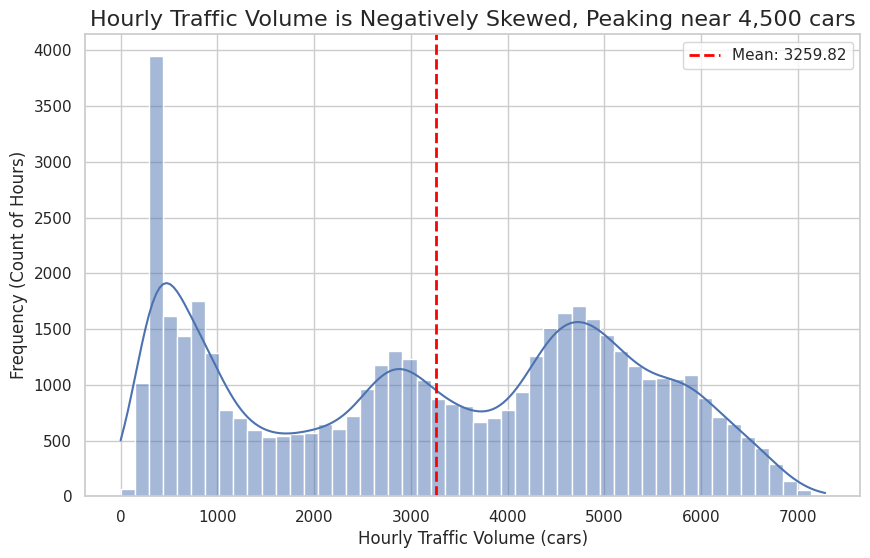

In [7]:
# Cell 6: Task 2.2.A - Histogram for Distribution
print("\n--- Task 2.2.A: Histogram ---")

plt.figure(figsize=(10, 6))

sns.histplot(df['traffic_volume'], bins=50, kde=True)

# Accessibility Check: Labeling and Annotation
mean_val = df['traffic_volume'].mean()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')

plt.title('Hourly Traffic Volume is Negatively Skewed, Peaking near 4,500 cars', fontsize=16)
plt.xlabel('Hourly Traffic Volume (cars)', fontsize=12)
plt.ylabel('Frequency (Count of Hours)', fontsize=12)
plt.legend()

plt.show()


--- Task 2.2.B: Box Plot ---
Q1: 1193.0, Q3: 4933.0
Interquartile Range (IQR = Q3 - Q1): 3740.0


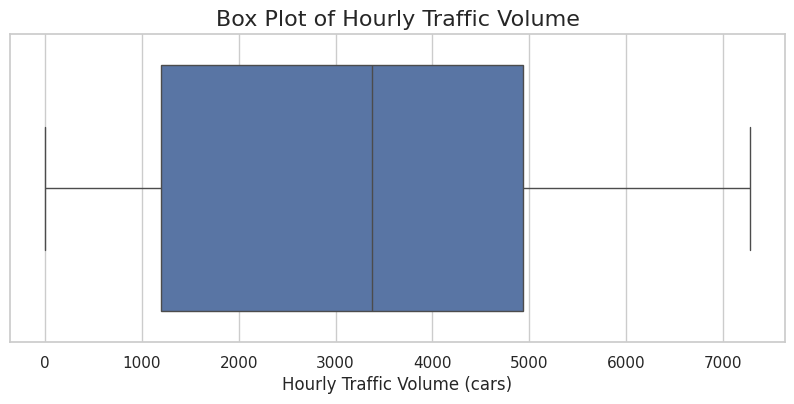

In [8]:
# Cell 7: Task 2.2.B - Box Plot for Dispersion
print("\n--- Task 2.2.B: Box Plot ---")

plt.figure(figsize=(10, 4))

sns.boxplot(x=df['traffic_volume'])

# Calculate IQR
Q1 = df['traffic_volume'].quantile(0.25)
Q3 = df['traffic_volume'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}")
print(f"Interquartile Range (IQR = Q3 - Q1): {IQR}")

plt.title('Box Plot of Hourly Traffic Volume', fontsize=16)
plt.xlabel('Hourly Traffic Volume (cars)', fontsize=12)

plt.show()


--- Task 2.2.C: Grouped Box Plots (Holiday vs. None) ---


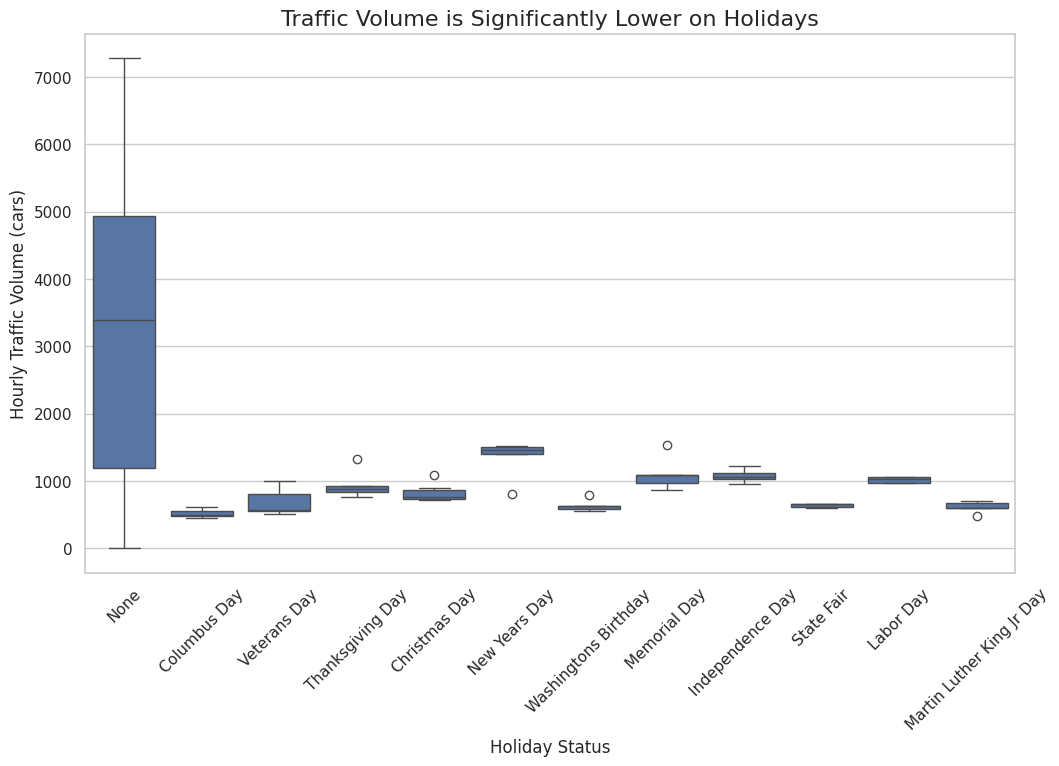

In [9]:
# Cell 8: Task 2.2.C - Grouped Box Plots (Holiday vs. None)
print("\n--- Task 2.2.C: Grouped Box Plots (Holiday vs. None) ---")

plt.figure(figsize=(12, 7)) # Made figure wider

# Create side-by-side box plots
# This now works correctly because we filled 'None' in Cell 2
sns.boxplot(data=df, x='holiday', y='traffic_volume')

plt.title('Traffic Volume is Significantly Lower on Holidays', fontsize=16)
plt.xlabel('Holiday Status', fontsize=12)
plt.ylabel('Hourly Traffic Volume (cars)', fontsize=12)
# Rotate x-axis labels for readability
plt.xticks(rotation=45)

plt.show()


--- Task 2.3: Correlation Matrix and Heatmap ---

Correlation Matrix:
                traffic_volume      temp   rain_1h   snow_1h  clouds_all
traffic_volume        1.000000  0.130299  0.004714  0.000733    0.067054
temp                  0.130299  1.000000  0.009069 -0.019755   -0.101976
rain_1h               0.004714  0.009069  1.000000 -0.000090    0.004818
snow_1h               0.000733 -0.019755 -0.000090  1.000000    0.027931
clouds_all            0.067054 -0.101976  0.004818  0.027931    1.000000


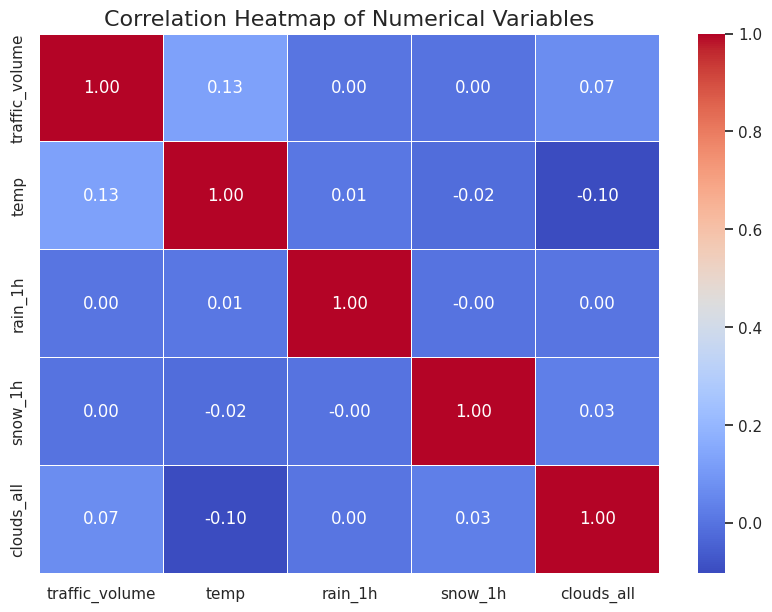


Strongest absolute correlation with traffic_volume is: 
temp    0.130299
Name: traffic_volume, dtype: float64


In [10]:
# Cell 9: Task 2.3.A & B - Correlation Matrix and Heatmap
print("\n--- Task 2.3: Correlation Matrix and Heatmap ---")

numerical_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all']

corr_matrix = df[numerical_cols].corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

# Generate the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix,
            annot=True,     # Show values
            cmap='coolwarm',
            fmt='.2f',        # 2 decimal places
            linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Variables', fontsize=16)
plt.show()

# Analysis for Question 2.3.B
abs_corr = corr_matrix['traffic_volume'].drop('traffic_volume').abs().sort_values(ascending=False)
print(f"\nStrongest absolute correlation with traffic_volume is: \n{abs_corr.head(1)}")

In [11]:
# Cell 10: Task 2.4 (Bonus) - Interactive Scatter Plot with Plotly
print("\n--- Task 2.4 (Bonus): Interactive Scatter Plot ---")

# Use a sample of 5000 points to avoid browser lag
df_sample = df.sample(5000)

fig = px.scatter(
    df_sample,
    x='temp',
    y='traffic_volume',
    hover_data=['weather_description', 'date_time'],
    opacity=0.5,

    # Action Title
    title='Traffic Volume Dips at Extreme Temperatures (Hot & Cold)'
)

# Improve layout
fig.update_layout(
    xaxis_title="Temperature (Kelvin)",
    yaxis_title="Hourly Traffic Volume"
)

fig.show()


--- Task 2.4 (Bonus): Interactive Scatter Plot ---
